In [1]:
import os
import librosa
import librosa.display
import IPython.display as idp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
wav = '../audio/my-song.wav'

idp.Audio(wav)

In [3]:
waveform, sr = librosa.load(wav)

In [4]:
waveform

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [5]:
sample_duration = 1/sr
print(f'Sample rate is {sr}, and Sample duration is {sample_duration : 6f} second')

Sample rate is 22050, and Sample duration is  0.000045 second


In [6]:
duration = sample_duration * waveform.size
print(f'Duration is {duration} seconds')

Duration is 29.0 seconds


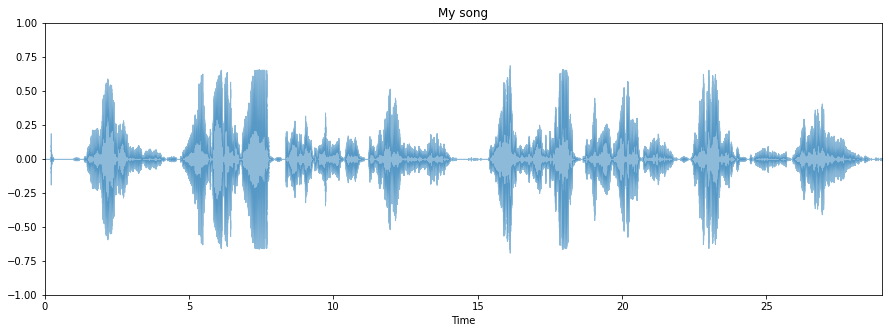

In [7]:
plt.figure(figsize=(15,5))
librosa.display.waveplot(waveform, alpha=0.5)
plt.title('My song')
plt.ylim((-1, 1))
plt.show()

In [8]:
def amplitude_envelope(signal, frame_size, hop):
    ae = []
    
    for i in range(0, len(signal), hop):
        sub = signal[i : i + frame_size]     
        m = max(sub)
        ae.append(m)
        
    return np.array(ae)

In [14]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

my_song_ae = amplitude_envelope(waveform, FRAME_SIZE, HOP_LENGTH)
print(f'Total {my_song_ae.size} points')

Total 1249 points


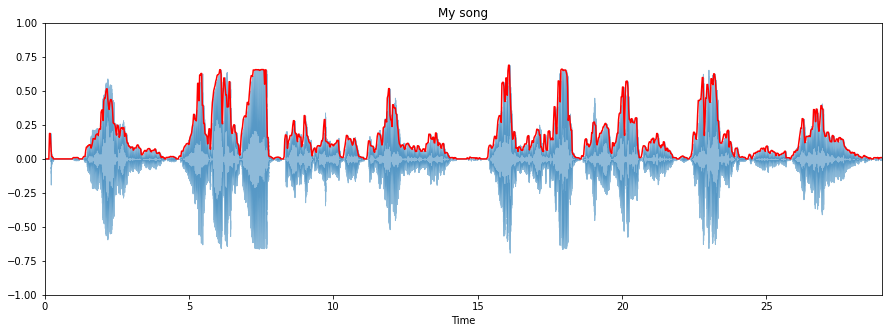

In [17]:
frames = range(0, my_song_ae.size)
t = librosa.frames_to_time(frames, hop_length = HOP_LENGTH)

plt.figure(figsize=(15,5))
librosa.display.waveplot(waveform, alpha=0.5)
plt.plot(t, my_song_ae, color='red')
plt.title('My song')
plt.ylim((-1, 1))
plt.show()